In [ ]:
import random
import math
from alive_progress import alive_bar #progress bar for loops
import matplotlib.pyplot as plt
import time

### PART 0: IMPLEMENTATION OF SORTING ALGORITHMS

In [2]:
#Insertion Sort
def insertionsort(lst): 
    arr = lst[:]
    comparisons = 0     
    for i in range(1, len(arr)): 
        key = arr[i] 
        j = i - 1 
        while j >= 0: 
            comparisons += 1 
            if arr[j] > key: 
                arr[j + 1] = arr[j] 
                j -= 1 
            else: 
                break 
            arr[j + 1] = key 
    return (arr, comparisons)

#Merge Sort
#will be used in hybrid algorithm
def merge(l1, l2):
    #print(l1, l2)
    ans = []
    p1 = 0
    p2 = 0
    comparisons = 0
    while p1<len(l1) and p2<len(l2):
        comparisons += 1
        if l1[p1] < l2[p2]:
            ans.append(l1[p1])
            p1+=1
        else:
            ans.append(l2[p2])
            p2+=1
    ans.extend(l1[p1:])
    ans.extend(l2[p2:])
    return (ans, comparisons)

def mergesort(lst):
    if len(lst)<=1:
        return lst[:], 0
    mid = len(lst)//2
    left, left_comps = mergesort(lst[:mid])
    right, right_comps = mergesort(lst[mid:])
    merged, merge_comps = merge(left, right)
    return merged, left_comps + right_comps + merge_comps

### PART A: HYBRID SORT

In [3]:
#function that integrates the insertion sort and the merge sort logics
def integrate(lst, S=15):
    def hybrid(arr):
        n = len(arr)
        if n <= 1:
            return (list(arr), 0)
        if n <= S:
            return insertionsort(arr)
        mid = n // 2
        left_sorted, left_comp = hybrid(arr[:mid])
        right_sorted, right_comp = hybrid(arr[mid:])
        merged, merge_comp = merge(left_sorted, right_sorted)
        return (merged, left_comp + right_comp + merge_comp)

    return hybrid(lst)

### PART B: GENERATION OF DATASETS

In [4]:
#function to generate datasets (for different sizes)
def generate_datasets(sizes,x): #x is the max value of the random integers
    datasets={}
    for n in sizes:
        datasets[n]=[random.randint(0,x) for _ in range(n)]
    return datasets
sizes=[1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]
datasets=generate_datasets(sizes,1000000000) #dictionary of datasets with key as size

#function to generate multiple datasets (for same size)
def generate_datasets_n(size,number_of_datasets,x): 
    datasets={}
    for n in range(number_of_datasets):
        datasets[n]=[random.randint(0,x) for _ in range(size)]
    return datasets #dictionary of datasets with same size


### PART C: TESTING THE SORTS AND PLOTTING GRAPHS

#### Part C.2 

With the input size n fixed, plot the number of key comparisons over
different values of S. Compare your empirical results with your
theoretical analysis of the time complexity.

In [ ]:
# Testing on input size n
n = 10000
number_of_datasets = 100
x = 1000000000
# generate 100 datasets of size n
datasets_c_2 = generate_datasets_n(n, number_of_datasets, x)
print(f"Generated {len(datasets_c_2)} datasets of size {n} for testing.") # can be reused for testing
s = [x for x in range(1,101)] # S values from 1 to 100
comps_hyb_dict = {} # each S value (key) is mapped to average comparisons (value)
with alive_bar(len(s), title="Comparison counting in progress...", force_tty=True) as bar:
    for i in s:
        avg_comps = 0 #average comparisons for each S value
        for j in datasets_c_2:
            avg_comps += integrate(datasets_c_2[j], i)[1] #adding up comparisons for each S value
        comps_hyb_dict[i] = avg_comps/len(datasets_c_2) #average comparisons for each S value
        bar()

Generated 100 datasets of size 10000 for testing.
Comparison counting in progress... |████████████████████████████████████████| 10


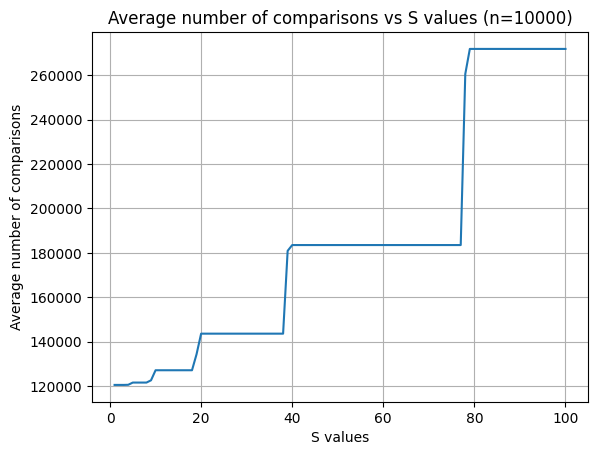

In [48]:
# Plotting average comparisons against varying S values

plt.plot(list(comps_hyb_dict.keys()), list(comps_hyb_dict.values()))
plt.xlabel("S values")
plt.ylabel("Average number of comparisons")
plt.title(f"Average number of comparisons vs S values (n={n})")
plt.grid()
plt.show()

In [47]:
for j in datasets_c_2:
    # print(j)
    assert integrate(datasets_c_2[j], 15)[0] == sorted(datasets_c_2[j]) #checking if hybrid sort works correctly

##### Analysis of Time Complexity

When recursion stops at size $S$, number of subarrays $\approx \frac{n}{s}$. <br>
In the worst case, insertion sort does $1+2+3+...+(n-1)$ comparisons.<br> Therefore considering randomly ordered subarray, on average, comparisons stop halfway through the list (element is somewhere in the middle). <br>The expected number of comparisons done by insertion sort on subarray of size $S$ is $\frac{1}{2}(1+2+3...+(S-1))=\frac{1}{2} \cdot \frac{S(S-1)}{2} = \frac{S(S-1)}{4}$.<br>
The number of comparisons done by insertion sort on all subarrays is $$\frac{n}{S} \cdot \frac{S(S-1)}{4} = \frac{n(S-1)}{4}$$ <br>
Combining with mergesort, $$T_{hybrid}(n, S) = n\ \log_2\ \frac{n}{S} + \frac{n(S-1)}{4}$$

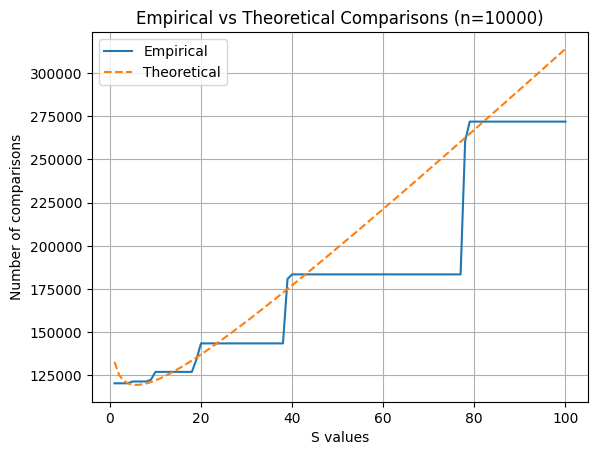

In [52]:
def theoretical_comparisons(n, S): #approx number of comparisons for hybrid
    if S >= n:
        # if S >= n, it's just insertion sort on the whole array
        return  (n * (n-1) / 4)
    return n * math.log2(n / S) + (n * (S-1) / 4)
# n and s were definied earlier, n = 10000, s = [x for x in range(1,101)]
theoretical_results = {S: theoretical_comparisons(n, S) for S in s}

# plotting empirical vs theoretical results
plt.plot(list(comps_hyb_dict.keys()), list(comps_hyb_dict.values()), label="Empirical")
plt.plot(list(theoretical_results.keys()), list(theoretical_results.values()), label="Theoretical", linestyle="--")

plt.xlabel("S values")
plt.ylabel("Number of comparisons")
plt.title(f"Empirical vs Theoretical Comparisons (n={n})")
plt.legend()
plt.grid(True)
plt.show()

### PART C.3

In [53]:
datasets_c_2

{0: [288904661,
  813939802,
  513378988,
  206136184,
  915847423,
  866990040,
  420372326,
  231430055,
  396486228,
  482343478,
  600059204,
  394663844,
  932743841,
  590632514,
  587290455,
  719053280,
  925764962,
  343121422,
  743764257,
  69286085,
  508525082,
  842667131,
  826009309,
  955146088,
  337898453,
  352636758,
  452489682,
  57124648,
  873183935,
  537476824,
  756923913,
  766156621,
  524201922,
  824993054,
  62201537,
  290183070,
  155059193,
  4823892,
  57669515,
  361223212,
  932313758,
  313131419,
  624192563,
  960819471,
  465657232,
  256259543,
  114022026,
  164708639,
  294822857,
  138789308,
  401126905,
  688772351,
  383735836,
  220911417,
  136318617,
  438272753,
  387930385,
  652162874,
  561880185,
  770227127,
  851202494,
  910609737,
  237519083,
  686081036,
  158360552,
  499973770,
  500913464,
  244291365,
  647915177,
  685928012,
  563994851,
  167574573,
  999466161,
  436042004,
  197823898,
  105542102,
  447980743,
  